#      Develop a text classification model to classify SMS as either spam or                             non- spam using data science techniques in Python. 📩

## Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importing Stopwords
import nltk
from nltk.corpus import stopwords
import string

# models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# train test split
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline

# score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

## Import Data

In [76]:
df=pd.read_csv('/Users/poorn/OneDrive/Desktop/spam.csv', encoding='latin1')

## Basic Analysis

In [77]:
df.head()

,label,Text,lable_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [78]:
df.describe()

,lable_num
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [50]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5572 non-null   object
 1   Text       5572 non-null   object
 2   lable_num  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [52]:
# adding new column as length of the text
df['length'] = df['Text'].apply(len)
df.head()

,label,Text,lable_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## EDA

Text(0.5, 1.0, 'Number of Spam and Ham')

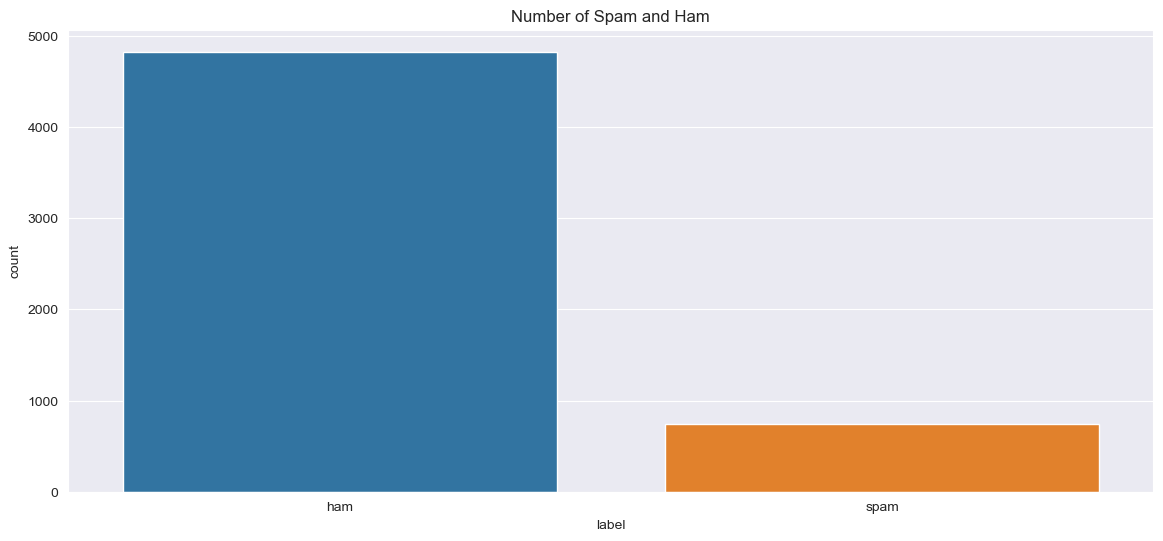

In [53]:
# plot for count of spam and ham in data
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)
plt.title('Number of Spam and Ham')

Text(0.5, 1.0, 'Length of Text')

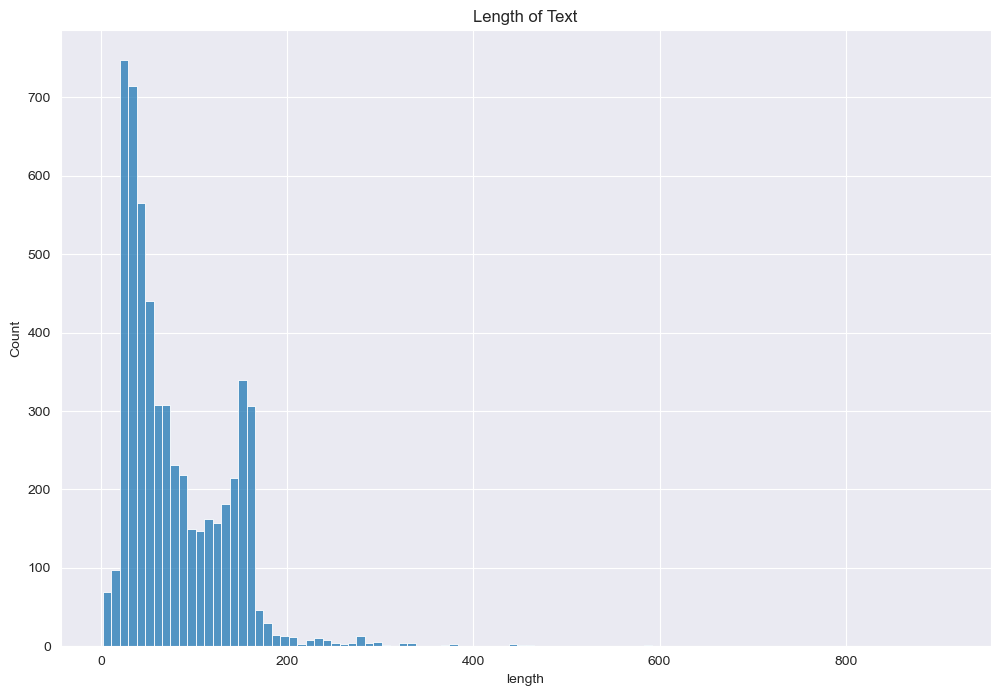

In [54]:
# Plot for distribution lenth of text
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df,bins=100)
plt.title('Length of Text')

In [56]:
# maximum lenth text 
df[df['length']==df['length'].max()]['Text']

1084    For me the love should start with attraction.i...
Name: Text, dtype: object

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

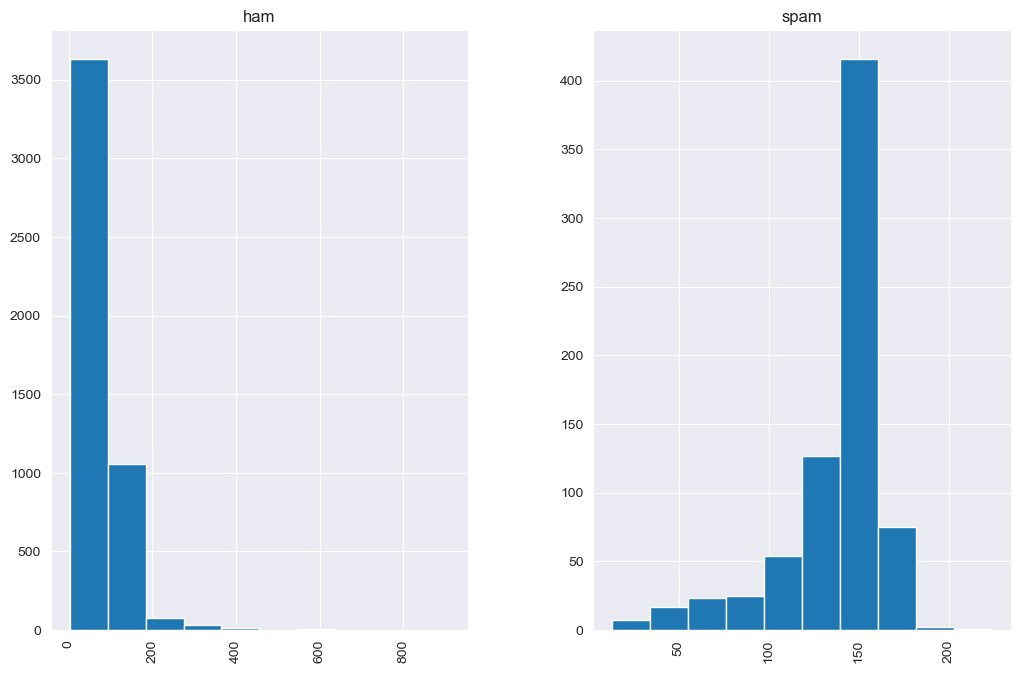

In [57]:
# distribution of spam and ham by length of text
df.hist(column='length',by='label',figsize=(12,8))

## Feature Enginering

In [58]:
# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

## Train Test Split

In [59]:
# define X(features),y(target)
X= df['Text']
y=df['label']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modles

In [61]:
# creating a pipline to model the data
# pipeline for MultinomialNB
pipe_mnb = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

# pipeline for Random Forest Classifier
pipe_rf =Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

# pipeline for Random Forest Classifier
pipe_svc =Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tf',TfidfTransformer()),
    ('classifier',SVC())
])

In [67]:
# fit the data
pipe_mnb.fit(X_train,y_train)
pipe_rf.fit(X_train,y_train)
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002C4A5559800>)),
                ('tf', TfidfTransformer()), ('classifier', SVC())])

In [68]:
# predict the target feature
pred_mnb = pipe_mnb.predict(X_test)
pred_rf = pipe_rf.predict(X_test)
pred_svc = pipe_svc.predict(X_test)

## Prediction Accuracy

In [69]:
print('The accuracy for Multinomial Classifer:',accuracy_score(y_test,pred_mnb)*100)
print('The accuracy for Random_forest Classifer:',accuracy_score(y_test,pred_rf)*100)
print('The accuracy for SVC:',accuracy_score(y_test,pred_svc)*100)

The accuracy for Multinomial Classifer: 95.59543230016313
The accuracy for Random_forest Classifer: 97.06362153344209
The accuracy for SVC: 97.22675367047309


## The SVC predicts better tham Random Forest Model and Multinomial.

In [70]:
# print confusion matrix and classification report
print ('Classification report on SVC:')
print('\n')
print(classification_report(y_test,pred_svc))

Classification report on SVC:


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1587
        spam       1.00      0.80      0.89       252

    accuracy                           0.97      1839
   macro avg       0.98      0.90      0.94      1839
weighted avg       0.97      0.97      0.97      1839



Text(0.5, 1.0, 'Confusion Matrix for SVC')

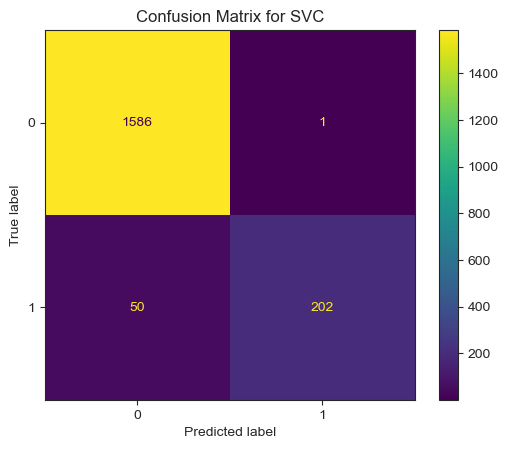

In [71]:
# Display confusioni matrix for SVC

sns.set_style('ticks')
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_svc)).plot()
plt.title("Confusion Matrix for SVC")

In [72]:
from sklearn.model_selection import cross_val_score

# Number of folds
k = 5

# Initialize the SVC model in the pipeline
pipe_svc.set_params(classifier=SVC())

# Perform k-fold cross-validation
cv_scores = cross_val_score(pipe_svc, X, y, cv=k)

# Output the results
print(f'CV Scores for each fold: {cv_scores}')
print(f'Average CV Score: {np.mean(cv_scores)}')

CV Scores for each fold: [0.97668161 0.97130045 0.97217235 0.96858169 0.97845601]
Average CV Score: 0.9734384233280468


In [ ]:
>>> import nltk
>>> nltk.download("stopwords")